# Lab 3

1. 提交作業之前，建議可以先點選上方工具列的**Kernel**，再選擇**Restart & Run All**，檢查一下是否程式跑起來都沒有問題，最後記得儲存。
2. 請先填上下方的姓名(name)及學號(stduent_id)再開始作答，例如：
```python
name = "我的名字"
student_id= "B06201000"
```
3. 演算法的實作可以參考[lab-3](https://yuanyuyuan.github.io/itcm/lab-3.html), 有任何問題歡迎找助教詢問。
4. **Deadline: 10/30(Wed.)**

In [ ]:
name = "陳彥宇"
student_id = "B05303134"

---

# Exercise 2
---

## It is known that when interpolating a function $f(x)$ with a polynomial $p_{m+1}$ of degree $m$ that using $x_j$ for $j = 0, 1, \dots, m$ as interpolation points the error has the form
## $$|f(x) - p_{m+1}(x)| = \frac{\left| f^{(m+1)} (\xi_x) \right|}{(m+1)!}\ \left| \prod_{k=0}^{m} (x - x_k) \right|,$$
## where $\xi_x \in [x_0, x_m]$.

## Therefore, the polynomial $\omega_m(t) := \prod_{k=0}^{m} (t - x_k)$ influences the size of the interpolation error.

---
## 1. Put $m+1$ <span style="color:red"> *distinct equidistant points*</span> in the interval $[−1, 1]$, and plot $\omega_m(t)$ for $m = 5, 10, 15, 20$.

### Part 0. Import libraries.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### Part 1. Define $\omega_m(t)$ function.

In [2]:
def omega_m(t, x):
    
    # ===== 請實做程式 =====
    n = len(x)
    product = 1
    for i in range(n):
        product *= (t-x[i])
    return product
    # ====================

In [3]:
# Test
print('w_5(0.5) =', omega_m(0.5, np.linspace(-1, 1, 6)))


w_5(0.5) = 0.017325000000000007


### Part 2. Define the equidistant points function.

#### For example, if $m = 4$, then $m+1$ distinct equidistant points in the interval  $[−1,1]$ should be $[-1, -0.5, 0, 0.5, 1]$.
#### So the results of <code>equidistant_points(4)</code> will be <code>[-1.  -0.5  0.   0.5  1. ]</code>.

In [14]:
def equidistant_points(m):
    # ===== 請實做程式 =====
    t = 2/m
    return np.arange(-1,1+t,t)
    # ====================

In [15]:
# Test
m = 4
print("Equidistant points:", equidistant_points(m))


Equidistant points: [-1.  -0.5  0.   0.5  1. ]


### Part 3. plot $\omega_m(t)$ for $m = 5, 10, 15, 20$.
#### Please refer parts of plotting in " _lagrange.ipynb_ ".

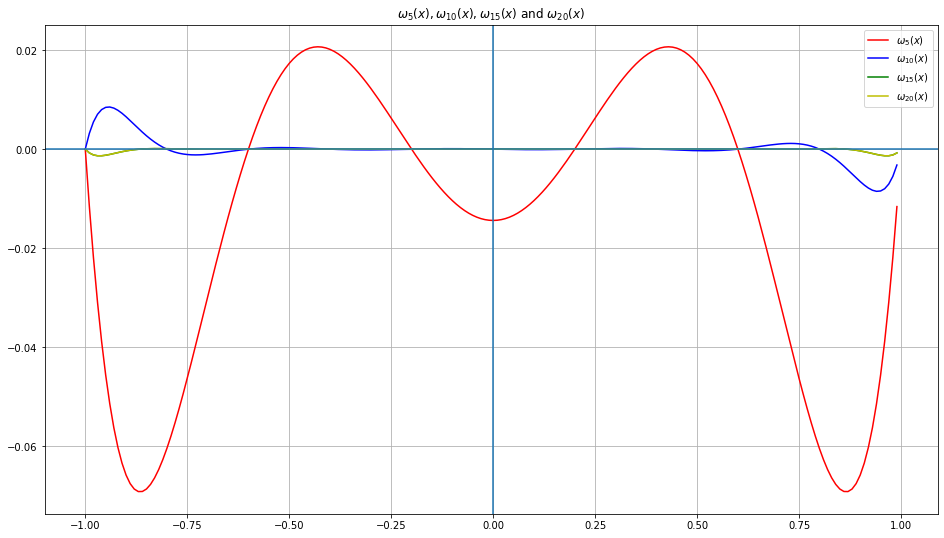

In [16]:
x_range = np.arange(-1, 1, 0.01)
fig, ax = plt.subplots(figsize=(16, 9))

# Plot the function w_5(x), w_10(x), w_15(x) and w_20(x)
#
# Hint: ax.plot( x_points, y_points, color='?', label='?')
# ===== 請實做程式 =====
ax.plot( x_range, omega_m(x_range,equidistant_points(5)), color='r', label='$\omega_{5}(x)$')
ax.plot( x_range, omega_m(x_range,equidistant_points(10)), color='b', label='$\omega_{10}(x)$')
ax.plot( x_range, omega_m(x_range,equidistant_points(15)), color='g', label='$\omega_{15}(x)$')
ax.plot( x_range, omega_m(x_range,equidistant_points(15)), color='y', label='$\omega_{20}(x)$')
# ====================

# Add other text and items
ax.set_title(r'$\omega_{5}(x), \omega_{10}(x), \omega_{15}(x)$ and $\omega_{20}(x)$')
plt.legend(loc='upper right')
ax.grid(True)
ax.axhline(y=0)
ax.axvline(x=0)
plt.show()

### Part 4. What's your observation of the above figure?

One can see the behavior near the boundary points $1$ and $-1$ is relatively ill to that at other points. That is, the error near the boundary is huge even though we increase the number of interpolation points from $5$ to $20$.

---
## 2. Redo " *Problem 1.* " using <span style="color:red">*zeros of the Chebyshev polynomial (Chebyshev nodes)*</span> as the interpolation points.

### Part 1. Define Chebyshev nodes.
#### Please refer the part of Chebyshev nodes in " _lagrange.ipynb_ ".

In [17]:
def chebv_nodes(m):
    # ===== 請實做程式 =====
    return -np.cos(np.linspace(0, np.pi, m+1))
    # ====================

In [18]:
# Test
m = 5
print("Chebyshev nodes:", chebv_nodes(m))


Chebyshev nodes: [-1.         -0.80901699 -0.30901699  0.30901699  0.80901699  1.        ]


### Part 2. plot $\omega(t)$ for $m = 5, 10, 15, 20$.
#### Please refer parts of plotting in " _lagrange.ipynb_ ".

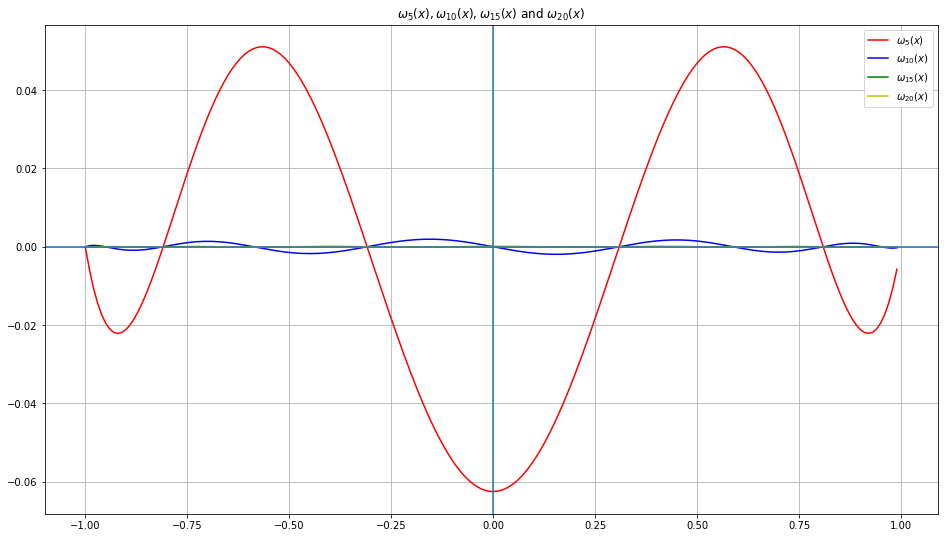

In [19]:
x_range = np.arange(-1, 1, 0.01)
fig, ax = plt.subplots(figsize=(16, 9))

# Plot the function w_5(x), w_10(x), w_15(x) and w_20(x)
#
# Hint: ax.plot( x_points, y_points, color='?', label='?')
# ===== 請實做程式 =====
ax.plot( x_range, omega_m(x_range,chebv_nodes(5)), color='r', label='$\omega_{5}(x)$')
ax.plot( x_range, omega_m(x_range,chebv_nodes(10)), color='b', label='$\omega_{10}(x)$')
ax.plot( x_range, omega_m(x_range,chebv_nodes(15)), color='g', label='$\omega_{15}(x)$')
ax.plot( x_range, omega_m(x_range,chebv_nodes(15)), color='y', label='$\omega_{20}(x)$')
# ====================

# Add other text and items
ax.set_title(r'$\omega_{5}(x), \omega_{10}(x), \omega_{15}(x)$ and $\omega_{20}(x)$')
plt.legend(loc='upper right')
ax.grid(True)
ax.axhline(y=0)
ax.axvline(x=0)
plt.show()

### Part 3. What's your observation of the above figure?

We controll the error of the whole interpolation polynomial in the sense that each part of the figure has similar amount of error including the points near the boundary $1$ and $-1$. As the interpolation points increaseing, the whole funciotn seems to become closer and closer to $0$, which is better than the case of distinct equidistant points. 